# NBA Inferential Statistics

In [1]:
#Import packages
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, sem
import seaborn as sns
import matplotlib.style as style
pd.set_option('display.max_columns', 75)
%matplotlib inline



In [2]:
plyr_logs = pd.read_csv('player_logs_corrected.csv', index_col = 0)
team_logs = pd.read_csv('team_logs_full.csv', index_col = 0)
team_logs.head()

,game_date,year,month,day,season_id,season,team_id,team,team_name,opp,game_id,home,matchup,wl,mp,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus,fscore,opp_mp,opp_fgm,opp_fga,opp_fg_pct,opp_fg3m,opp_fg3a,opp_fg3_pct,opp_ftm,opp_fta,opp_ft_pct,opp_oreb,opp_dreb,opp_reb,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf,opp_pts,opp_plus_minus,opp_fscore,possessions,opp_possessions,pace,off_eff,def_eff
0,2000-10-31,2000,10,31,22000,2000,1610612762,UTA,Utah Jazz,LAC,20000010,1,UTA vs. LAC,1.0,240,43,85,0.506,5,10,0.500,16,31,0.516,11,22,33,33,11,4,12,30,107,13,228.75,240,34,69,0.493,4,13,0.308,22,34,0.647,12,32,44,18,3,6,24,32,94,-13,188.50,97.903721,93.382353,95.643037,109.291045,96.012694
1,2000-10-31,2000,10,31,22000,2000,1610612747,LAL,Los Angeles Lakers,POR,20000012,0,LAL @ POR,1.0,240,36,63,0.571,5,11,0.455,19,30,0.633,8,31,39,28,5,8,20,18,96,10,209.75,240,34,85,0.400,4,11,0.364,14,16,0.875,13,19,32,18,13,1,10,28,86,-10,182.50,86.440000,85.277045,85.858523,111.059695,99.490976
2,2000-10-31,2000,10,31,22000,2000,1610612763,MEM,Vancouver Grizzlies,OKC,20000013,1,VAN vs. SEA,1.0,240,39,90,0.433,4,14,0.286,12,26,0.462,14,37,51,28,12,6,11,21,94,6,236.75,240,32,84,0.381,8,23,0.348,16,22,0.727,14,38,52,20,5,9,19,25,88,-6,210.00,96.708077,96.526275,96.617176,97.199741,90.995502
3,2000-10-31,2000,10,31,22000,2000,1610612757,POR,Portland Trail Blazers,LAL,20000012,1,POR vs. LAL,0.0,240,34,85,0.400,4,11,0.364,14,16,0.875,13,19,32,18,13,1,10,28,86,-10,182.50,240,36,63,0.571,5,11,0.455,19,30,0.633,8,31,39,28,5,8,20,18,96,10,209.75,85.277045,86.440000,85.858523,100.847772,112.574257
4,2000-10-31,2000,10,31,22000,2000,1610612756,PHX,Phoenix Suns,GSW,20000011,0,PHX @ GSW,0.0,240,36,91,0.396,6,21,0.286,16,20,0.800,11,33,44,25,12,3,16,28,94,-2,216.00,240,32,79,0.405,4,8,0.500,28,38,0.737,14,41,55,18,11,5,21,22,96,2,219.75,102.550962,100.220000,101.385481,91.661744,93.611994


In [3]:
stat_cols = list(team_logs.loc[:,'wl':].columns)
team_avgs = team_logs.groupby(['season','team']).mean()[stat_cols].reset_index()
team_avgs.head(10)

,season,team,wl,mp,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus,fscore,opp_mp,opp_fgm,opp_fga,opp_fg_pct,opp_fg3m,opp_fg3a,opp_fg3_pct,opp_ftm,opp_fta,opp_ft_pct,opp_oreb,opp_dreb,opp_reb,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf,opp_pts,opp_plus_minus,opp_fscore,possessions,opp_possessions,pace,off_eff,def_eff
0,2000,ATL,0.304878,240.609756,35.073171,81.317073,0.431305,4.060976,11.378049,0.359317,16.756098,22.085366,0.765671,12.536585,30.365854,42.902439,19.012195,7.731707,4.719512,16.682927,22.719512,90.963415,-5.207317,196.164634,240.609756,35.634146,80.597561,0.444146,4.829268,13.170732,0.358293,20.073171,26.256098,0.765634,12.548780,30.902439,43.451220,21.182927,8.512195,6.256098,14.780488,20.682927,96.170732,5.207317,211.320122,92.563862,91.859806,91.964603,98.331064,103.894681
1,2000,BKN,0.317073,240.609756,33.914634,79.878049,0.424195,4.402439,13.219512,0.325049,19.865854,26.170732,0.761171,11.085366,28.500000,39.585366,19.548780,7.914634,4.963415,14.731707,24.170732,92.097561,-5.048780,195.993902,240.609756,35.817073,78.682927,0.455866,5.219512,14.500000,0.352671,20.292683,27.207317,0.745390,12.207317,31.975610,44.182927,22.439024,7.548780,6.365854,15.902439,22.048780,97.146341,5.048780,213.021341,92.410336,91.696782,91.821171,99.645696,105.224893
2,2000,BOS,0.439024,241.829268,33.817073,79.085366,0.428549,7.219512,19.914634,0.356805,19.768293,26.707317,0.736402,10.939024,28.865854,39.804878,20.829268,9.378049,4.097561,15.670732,23.804878,94.621951,-2.134146,202.847561,241.829268,35.792683,77.951220,0.461244,5.243902,14.268293,0.363988,19.926829,26.560976,0.751317,10.829268,32.317073,43.146341,22.987805,7.926829,5.365854,17.097561,23.207317,96.756098,2.134146,210.329268,93.162640,93.348396,92.552747,101.674433,103.981078
3,2000,CHA,0.560976,242.439024,34.146341,79.280488,0.432915,4.146341,12.000000,0.340244,19.500000,26.170732,0.743256,12.597561,31.804878,44.402439,23.170732,8.109756,5.548780,14.426829,21.378049,91.939024,2.097561,208.875000,242.439024,33.743902,79.280488,0.426902,4.743902,13.182927,0.357768,17.609756,23.292683,0.760268,10.878049,29.707317,40.585366,21.317073,7.512195,4.573171,14.682927,21.560976,89.841463,-2.097561,196.250000,89.798869,90.848971,89.465060,102.406031,100.173790
4,2000,CHI,0.182927,242.134146,33.182927,78.182927,0.425561,4.012195,11.585366,0.347720,17.195122,23.280488,0.736854,11.292683,27.560976,38.853659,22.073171,8.231707,4.621951,15.756098,23.195122,87.573171,-9.097561,193.585366,242.134146,36.426829,77.195122,0.474280,4.219512,11.865854,0.337841,19.597561,26.853659,0.731415,11.670732,31.109756,42.780488,23.560976,7.743902,5.195122,14.841463,21.390244,96.670732,9.097561,210.518293,90.406120,89.833759,89.379496,96.903257,107.017579
5,2000,CLE,0.365854,241.829268,35.243902,79.658537,0.443476,2.682927,8.036585,0.317634,19.036585,24.878049,0.766402,12.378049,29.756098,42.134146,20.829268,7.829268,5.317073,16.463415,23.219512,92.207317,-4.243902,200.021341,241.829268,35.695122,80.268293,0.445756,5.146341,14.085366,0.365902,19.914634,25.914634,0.766341,12.073171,29.268293,41.341463,22.926829,8.463415,6.609756,14.987805,22.073171,96.451220,4.243902,212.243902,91.967102,91.767158,91.185589,100.251994,104.846670
6,2000,DAL,0.646341,241.524390,37.621951,81.902439,0.460939,6.304878,16.548780,0.380171,18.926829,23.829268,0.794012,10.134146,31.353659,41.487805,21.219512,7.536585,6.000000,13.914634,23.256098,100.475610,4.280488,211.932927,241.524390,35.829268,81.621951,0.440829,4.646341,13.902439,0.330963,19.890244,27.207317,0.735744,13.024390,31.987805,45.012195,21.682927,7.585366,4.621951,15.524390,22.536585,96.195122,-4.280488,208.460366,93.983238,93.615210,93.237749,106.997355,102.406571
7,2000,DEN,0.487805,241.219512,36.329268,83.865854,0.433256,6.243902,17.609756,0.346817,17.658537,23.951220,0.734488,12.731707,31.500000,44.231707,24.024390,6.731707,6.560976,13.853659,22.195122,96.560976,-2.463415,215.167683,241.219512,37.573171,84.317073,0.44

In [4]:
stat_cols = list(plyr_logs.loc[:,'wl':].columns)

#filter player logs dataset for player who played in at least half of the games in a season
plyrs_played = plyr_logs.loc[plyr_logs.mp > 0].groupby(['season','player_name']).filter(lambda x: len(x) >= 41)
plyr_avgs = plyrs_played.groupby(['season','player_name']).mean()[stat_cols].reset_index()
plyr_avgs.head()

,season,player_name,wl,mp,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus,fscore,ast_pct,blk_pct,dreb_pct,oreb_pct,reb_pct,stl_pct,tov_pct,efg_pct,ts_pct,usg_pct
0,2000,A.C. Green,0.609756,17.219512,1.756098,3.951220,0.351780,0.000000,0.073171,0.000000,0.963415,1.353659,0.326232,1.304878,2.512195,3.817073,0.475610,0.365854,0.097561,0.548780,1.451220,4.475610,1.243902,10.667683,3.930819,0.445817,17.774322,8.672937,13.223630,0.965493,9.963564,0.389858,0.416397,13.597581
1,2000,Aaron McKie,0.671053,31.447368,4.447368,9.394737,0.457724,0.697368,2.236842,0.262447,1.960526,2.552632,0.586776,0.434211,3.657895,4.092105,4.960526,1.394737,0.105263,2.671053,2.342105,11.552632,4.486842,26.358553,25.781781,0.231333,12.592359,1.497396,7.044877,2.296752,20.733025,0.496545,0.536935,19.116036
2,2000,Aaron Williams,0.317073,28.548780,3.621951,7.926829,0.445695,0.000000,0.024390,0.000000,2.975610,3.780488,0.751707,2.573171,4.621951,7.195122,1.073171,0.719512,1.378049,1.609756,3.890244,10.219512,-4.646341,24.432927,6.485789,3.443495,19.281978,11.184918,15.233448,1.355105,14.148201,0.445695,0.528853,18.159175
3,2000,Adam Keefe,0.208955,12.522388,0.955224,2.373134,0.300866,0.014925,0.044776,0.014925,0.582090,0.940299,0.227612,1.343284,1.776119,3.119403,0.537313,0.417910,0.298507,0.597015,1.522388,2.507463,-2.611940,8.354478,5.065007,1.683192,12.516713,11.067048,11.791881,1.460804,26.095399,0.412670,0.454261,12.371166
4,2000,Adonal Foyle,0.137931,25.172414,2.689655,6.465517,0.400897,0.000000,0.000000,0.000000,0.517241,1.172414,0.202293,2.689655,4.293103,6.982759,0.827586,0.534483,2.689655,1.362069,2.344828,5.896552,-5.482759,21.814655,5.369055,7.549908,16.749194,10.970786,13.859990,1.088616,17.884407,0.422731,0.408491,12.921875


### Test performance against good and bad defenses
$H_0$ = Average fantasy score is equal against top 15 and bottom 15 defenses.

$H_A$ = Average fantasy score changes when players play against top 15 and bottom 15 defenses.

In [5]:
#show only the top defensive team in terms of defensive efficiency for each season
top_def = team_avgs.set_index('team').groupby('season').def_eff.nsmallest(1).reset_index()
top_def = top_def.sort_values(['season','def_eff'])
top_def

,season,team,def_eff
0,2000,PHX,98.132080
1,2001,BKN,99.644772
2,2002,BKN,98.080348
3,2003,SAS,94.339681
4,2004,SAS,99.048210
5,2005,SAS,99.874555
6,2006,CHI,99.868385
7,2007,BOS,99.233015
8,2008,ORL,102.345856
9,2009,CHA,102.871759


In [6]:
# Filter player logs to return only games played against a top 5 defense that year
i1 = plyr_logs.set_index(['season','opp']).index
i2 = top_def.set_index(['season','team']).index
logs_top_d = plyr_logs[i1.isin(i2)].reset_index(drop=True)
logs_top_d

,game_date,year,month,day,season_id,season,player_id,player_name,team_id,team_abbreviation,team_name,team,opp,game_id,home,matchup,wl,mp,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus,fscore,ast_pct,blk_pct,dreb_pct,oreb_pct,reb_pct,stl_pct,tov_pct,efg_pct,ts_pct,usg_pct
0,2000-10-31,2000,10,31,22000,2000,168,Chris Mills,1610612744,GSW,Golden State Warriors,GSW,PHX,20000011,1,GSW vs. PHX,1,34,8,14,0.571,1,2,0.500,2,2,1.000,1,5,6.0,1,3,0,2,1,19,-6,33.50,6.774376,0.000000,12.780749,2.556150,7.668449,4.118840,11.848341,0.607143,0.638441,20.331815
1,2000-10-31,2000,10,31,22000,2000,1712,Antawn Jamison,1610612744,GSW,Golden State Warriors,GSW,PHX,20000011,1,GSW vs. PHX,1,28,4,9,0.444,0,0,0.000,5,8,0.625,0,6,6.0,1,1,0,4,3,13,13,22.00,6.782066,0.000000,18.623377,0.000000,9.311688,1.667149,24.213075,0.444444,0.519169,24.162097
2,2000-10-31,2000,10,31,22000,2000,1716,Larry Hughes,1610612744,GSW,Golden State Warriors,GSW,PHX,20000011,1,GSW vs. PHX,1,40,6,20,0.300,2,3,0.667,3,4,0.750,1,4,5.0,5,2,0,7,6,17,-2,32.25,24.063633,0.000000,8.690909,2.172727,5.431818,2.334009,24.339360,0.350000,0.390625,29.444997
3,2000-10-31,2000,10,31,22000,2000,228,Adam Keefe,1610612744,GSW,Golden State Warriors,GSW,PHX,20000011,1,GSW vs. PHX,1,4,1,1,1.000,0,0,0.000,1,1,1.000,0,0,0.0,0,0,0,0,0,3,4,3.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.041667,14.742975
4,2000-10-31,2000,10,31,22000,2000,1502,Adonal Foyle,1610612744,GSW,Golden State Warriors,GSW,PHX,20000011,1,GSW vs. PHX,1,14,2,3,0.667,0,0,0.000,0,0,0.000,1,7,8.0,3,0,2,1,3,4,13,22.00,40.692395,9.617706,43.454545,6.207792,24.831169,0.000000,25.000000,0.666667,0.666667,11.700774
5,2000-10-31,2000,10,31,22000,2000,219,Vinny Del Negro,1610612744,GSW,Golden State Warriors,GSW,PHX,20000011,1,GSW vs. PHX,1,10,1,3,0.333,1,1,1.000,1,1,1.000,0,1,1.0,1,0,0,0,1,4,5,7.25,17.560617,0.000000,8.690909,0.000000,4.345455,0.000000,0.000000,0.500000,0.581395,14.087731
6,2000-10-31,2000,10,31,22000,2000,956,Erick Dampier,1610612744,GSW,Golden State Warriors,GSW,PHX,20000011,1,GSW vs. PHX,1,30,2,4,0.500,0,0,0.000,6,10,0.600,2,4,6.0,0,2,2,3,2,10,-12,24.00,0.000000,4.488263,11.587879,5.793939,8.690909,3.112012,26.315789,0.500000,0.595238,15.562029
7,2000-10-31,2000,10,31,22000,2000,1907,Vonteego Cummings,1610612744,GSW,Golden State Warriors,GSW,PHX,20000011,1,GSW vs. PHX,1,13,1,4,0.250,0,1,0.000,0,0,0.000,0,0,0.0,1,1,0,0,2,2,0,5.50,12.982075,0.000000,0.000000,0.000000,0.000000,3.590783,0.000000,0.250000,0.250000,12.600833
8,2000-10-31,2000,10,31,22000,2000,302,Mookie Blaylock,1610612744,GSW,Golden State Warriors,GSW,PHX,20000011,1,GSW vs. PHX,1,35,3,12,0.250,0,1,0.000,0,0,0.000,1,4,5.0,5,2,1,3,2,6,2,24.25,24.472660,1.923541,9.932468,2.483117,6.207792,2.667439,20.000000,0.250000,0.250000,17.551160
9,2000-10-31,2000,10,31,22000,2000,1504,Danny Fortson,1610612744,GSW,Golden State Warriors,GSW,PHX,20000011,1,GSW vs. PHX,1,31,4,9,0.444,0,0,0.000,10,12,0.833,8,10,18.0,1,0,0,1,2,18,-7,43.00,5.969031,0.000000,28.035191,22.428152,25.231672,0.000000,6.544503,0.444444,0.630252,20.185722


In [7]:
print('Average player fantasy score =', plyr_logs.fscore.mean())
print('Average player fantasy score against #1 defenses =',logs_top_d.fscore.mean())

Average player fantasy score = 20.166606955727325
Average player fantasy score against #1 defenses = 18.82714038819463


In [8]:
def n_tm_ldrs_high(data, stat, n=5):
    """Returns desired number of team leaders of a stat certain for each season (leaders are higher values)"""
    top_n_stat = data.set_index('team').groupby('season')[stat].nlargest(n).reset_index()
    return top_n_stat.sort_values(['season',stat], ascending = [True,False])

def n_tm_ldrs_low(data, stat, n=5):
    """Returns desired number of team leaders of a certain stat for each season, (leaders are lower values)"""
    top_n_stat = data.set_index('team').groupby('season')[stat].nsmallest(n).reset_index()
    return top_n_stat.sort_values(['season',stat])

def n_pl_ldrs_high(data, stat, n=5):
    """Returns desired number of player leaders of a stat certain for each season (leaders are higher values)"""
    top_n_stat = data.set_index('player_name').groupby('season')[stat].nlargest(n).reset_index()
    return top_n_stat.sort_values(['season',stat], ascending = [True,False])

def n_pl_ldrs_low(data, stat, n=5):
    """Returns desired number of player leaders of a certain stat for each season, (leaders are lower values)"""
    top_n_stat = data.set_index('player_name').groupby('season')[stat].nsmallest(n).reset_index()
    return top_n_stat.sort_values(['season',stat])


def filter_by_cols(df1, df1cols, df2, df2cols):
    """Returns rows of a dataframe that have columns matching the values of columns from another dataframe"""
    i1 = df1.set_index(df1cols).index
    i2 = df2.set_index(df2cols).index
    return df1[i1.isin(i2)].reset_index(drop=True)
    


In [9]:
top_half_def = n_tm_ldrs_low(team_avgs, 'def_eff', 15)
bottom_half_def = n_tm_ldrs_high(team_avgs, 'def_eff',15)

In [10]:
logs_top_def = filter_by_cols(plyrs_played,['season','opp'],top_half_def,['season','team'])
logs_bad_def = filter_by_cols(plyrs_played,['season','opp'],bottom_half_def,['season','team'])

In [11]:
print('Average points scored against top 15 defenses:',logs_top_def.pts.mean())
print('Average points scored against bottom 15 defenses:',logs_bad_def.pts.mean())
print('Average points scored :',plyrs_played.pts.mean())


Average points scored against top 15 defenses: 10.049719120883537
Average points scored against bottom 15 defenses: 10.584734818908043
Average points scored : 10.318754325958784


In [12]:
print('Average assists against top 15 defenses:',logs_top_def.ast.mean())
print('Average assists against bottom 15 defenses:',logs_bad_def.ast.mean())
print('Average assists :',plyrs_played.ast.mean())

Average assists against top 15 defenses: 2.164633349747259
Average assists against bottom 15 defenses: 2.353094279936733
Average assists : 2.2584106743190877


In [13]:
print('Average assists against top 15 defenses:',logs_top_def.reb.mean())
print('Average assists against bottom 15 defenses:',logs_bad_def.reb.mean())
print('Average assists :',plyrs_played.reb.mean())

Average assists against top 15 defenses: 4.31820739832578
Average assists against bottom 15 defenses: 4.4044537209442005
Average assists : 4.3603694179343515


From the above statistics, there is always a slight drop from the average agains the top 15 defenses and a slight uptick against the bottom 15 defenses. To analyze this difference, lets look at the variation of each players points and fantasy score from there average for the season.

In [14]:
pts_dev = plyrs_played.groupby(['season','player_name']).pts.transform((lambda x: x-x.mean()))
plyrs_played['pts_dev'] = pts_dev

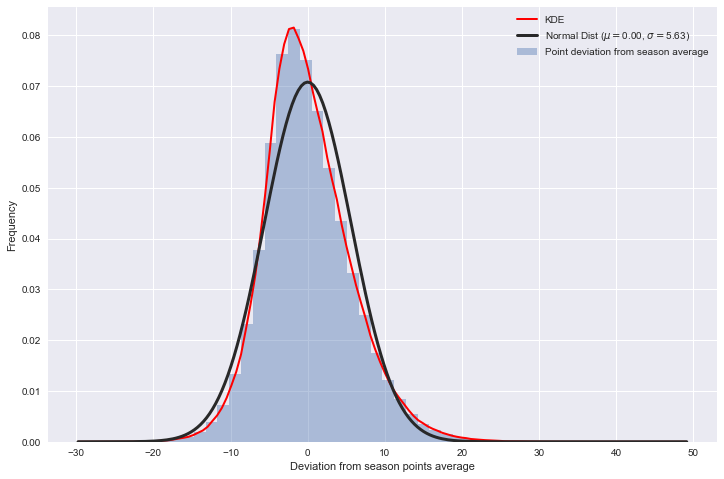

In [15]:
pts_mu, pts_sigma = pts_dev.mean(), pts_dev.std()
plt.figure(figsize=(12, 8))
sns.set()
ax = sns.distplot(pts_dev, fit=norm, kde=True, bins=50,
                  kde_kws={'label': 'KDE', 'color': 'red', 'linewidth':2},
                  hist_kws={'label': 'Point deviation from season average'},
                  fit_kws={'label': 'Normal Dist ($\mu=${0:.2f}, $\sigma=${1:.2f})'.format(pts_mu, pts_sigma),
                           'linewidth': 3})
ax.legend()
plt.xlabel('Deviation from season points average')
plt.ylabel('Frequency')
plt.show()

From the plot above, we can see that while the average deviation is at 0, which it should be, the median is slightly lower than 0. This means that players are more likely score below there season average, but also more likely to score a couple standards of deviation above their average. This is due to the fact that the bottom limit for scores is 0, which is closer to the a players average points per game total than say 30 or 40 points. This would skew the median slightly negative.

In [16]:
logs_top_def = filter_by_cols(plyrs_played,['season','opp'],top_half_def,['season','team'])
logs_bad_def = filter_by_cols(plyrs_played,['season','opp'],bottom_half_def,['season','team'])
print('Average deviation from season points average against top 15 defenses:',logs_top_def.pts_dev.mean())
print('Average deviation from season points average against bottom 15 defenses:',logs_bad_def.pts_dev.mean())
print('Average deviation from season points average:',plyrs_played.pts_dev.mean())
print('Median deviation from season points average:',plyrs_played.pts_dev.median())

Average deviation from season points average against top 15 defenses: -0.27065685909339393
Average deviation from season points average against bottom 15 defenses: 0.2716886447292975
Average deviation from season points average: 2.9528467162305803e-16
Median deviation from season points average: -0.5797101449275353


In [17]:
fscore_dev = plyrs_played.groupby(['season','player_name']).fscore.transform((lambda x: x-x.mean()))
plyrs_played['fscore_dev'] = fscore_dev
logs_top_def = filter_by_cols(plyrs_played,['season','opp'],top_half_def,['season','team'])
logs_bad_def = filter_by_cols(plyrs_played,['season','opp'],bottom_half_def,['season','team'])
print('Average deviation from season fscore average against top 15 defenses:',logs_top_def.fscore_dev.mean())
print('Average deviation from season fscore average against bottom 15 defenses:',logs_bad_def.fscore_dev.mean())
print('Average deviation from season fscore average:',plyrs_played.fscore_dev.mean())
print('Median deviation from season fscore average:',plyrs_played.fscore_dev.median())

Average deviation from season fscore average against top 15 defenses: -0.547094700245079
Average deviation from season fscore average against bottom 15 defenses: 0.5501950926289442
Average deviation from season fscore average: 8.575258919004579e-16
Median deviation from season fscore average: -0.7668918918918912


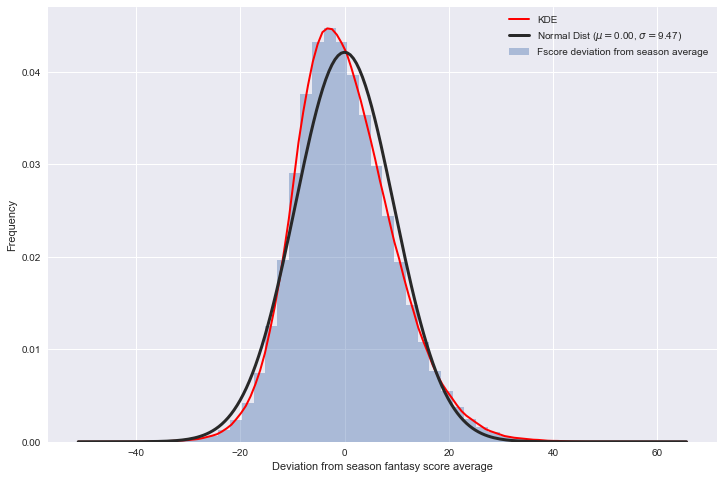

In [18]:
fscore_dev_mu, fscore_dev_sigma = fscore_dev.mean(), fscore_dev.std()
plt.figure(figsize=(12, 8))
sns.set()
ax = sns.distplot(fscore_dev, fit=norm, kde=True, bins=50,
                  kde_kws={'label': 'KDE', 'color': 'red', 'linewidth':2},
                  hist_kws={'label': 'Fscore deviation from season average'},
                  fit_kws={'label': 'Normal Dist ($\mu=${0:.2f}, $\sigma=${1:.2f})'.format(fscore_dev_mu, fscore_dev_sigma),
                           'linewidth': 3})
ax.legend()
plt.xlabel('Deviation from season fantasy score average')
plt.ylabel('Frequency')
plt.show()

In [19]:
from scipy.stats import ttest_ind

ttest_ind(logs_top_def.fscore_dev,logs_bad_def.fscore_dev)

Ttest_indResult(statistic=-36.65548795252132, pvalue=1.1592758028045207e-293)

This t-test result clearly rejects the null hypothesis with such a miniscule p-value. We can state, with nearly 100% confidence, that playing against a top 15 or bottom 15 defense has an effect on the statistcal performance of a player.

### Test home court performance
$H_0$ = Average fantasy score is equal at home and on the road

$H_A$ = Average fantasy score changes when players play at home or on the road

In [20]:
home = plyrs_played.loc[plyrs_played.home == 1]
away = plyrs_played.loc[plyrs_played.home == 0]

In [21]:
print('Average deviation from season fscore average at home:',home.fscore_dev.mean())
print('Average deviation from season fscore average on the road:',away.fscore_dev.mean())
print('Average deviation from season fscore average:',plyrs_played.fscore_dev.mean())

Average deviation from season fscore average at home: 0.4392245650266006
Average deviation from season fscore average on the road: -0.4403755425183466
Average deviation from season fscore average: 8.575258919004579e-16


These difference in fscore averages are not a surprising result, but I wanted to confirm in with another t-test.

In [22]:
ttest_ind(home.fscore_dev,away.fscore_dev)

Ttest_indResult(statistic=29.256191043543684, pvalue=5.951656900353099e-188)

The resulting t statistic is 29.256 with another extremely small p-value of 5.95E-188. The null hypothesis is rejected with nearly 100% certainty and home court advantage does in fact appear to exist.